# SKA Observatory Work Experience Notebook 🔭

Welcome to your virtual work experience with the SKA Observatory! The SKA (Square Kilometre Array) is one of the most ambitious science projects ever undertaken - an international effort to build the world's largest radio telescope.

## What is Radio Astronomy?
Just like your eyes see visible light, radio telescopes "see" radio waves from space. These waves come from fascinating objects like:
- Black holes
- Distant galaxies 
- Star nurseries
- And many mysterious phenomena we're still discovering!

## Software Engineering at SKA
As a software engineer at SKA, you'll work with:
- Real-time control systems
- Data processing pipelines
- Interactive visualization tools
- High-performance computing
- Scientific Python libraries

## Today's Engineering Tasks
You'll experience how SKA engineers:
- Build telescope control interfaces
- Implement signal processing algorithms
- Design modular, reusable code
- Create interactive visualizations
- Optimize system performance

## Development Environment
This notebook uses real SKA software development practices:
- Python scientific stack (numpy, matplotlib)
- Interactive widgets for UI development
- Test-driven development
- Code documentation
- Performance optimization

## How This Notebook Works
- Each exercise builds on what you learned before
- You can interact with everything - sliders, buttons, and **code**, especially the **code**
- Feel free to experiment and try different approaches
- There are no wrong answers - exploration is encouraged!

Let's start our journey into radio astronomy! 🌟

[![Binder](https://img.shields.io/badge/launch-SKA%20Work%20Experience-579ACA.svg?logo=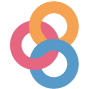)](https://k8s.stfc.skao.int/binderhub-outreach/v2/gl/ska-telescope%2Fradio-astro-tutorials/HEAD?labpath=outreach%2Fwork_experience.ipynb) 


## Dependencies

Follow this part if you are running this exercise locally (i.e. in your own notebook server)

### Required Software
- Python 3.8+
- Jupyter Notebook/Lab
- Required packages(listed in `requirements.txt` file): 
  - numpy
  - matplotlib
  - ipywidgets
  - scipy
  - ipycanvas

### Installation
Clone the repository/Download the code

```bash
git clone https://gitlab.com/ska-telescope/radio-astro-tutorials
cd outreach
```

Create a python environment and install dependencies
```bash
# Create and activate virtual environment
python -m venv .venv
source .venv/bin/activate  # On Windows: .venv\Scripts\activate

# Install required packages
pip install -r requirements.txt
```

Start your notebook instance and access it by following the output
```bash
jupyter lab
```


In [ ]:
# Run this if running locally, make sure to restart kernel afterwards and refresh browser
# %pip install ipywidgets numpy matplotlib scipy

# Can also run only the notebook with voila?
# Install all and run locally or in the binderhub from this repository:
# Link: https://k8s.stfc.skao.int/binderhub/v2/gl/ska-telescope%2Fradio-astro-tutorials/HEAD?labpath=outreach%2Fwork_experience.ipynb

## Interactive Exercises

In these exercises, you will control various parameters of a radio telescope. Use the provided functions and widgets to simulate changes and observe their effects.

### Instructions:
- Use the controls to adjust telescope parameters such as dish size or frequency.
- Run the cells after making adjustments to see the changes.
- For coding enthusiasts, additional coding challenges are provided to extend your understanding.


## Exercise 1: Adjusting Telescope View

In this exercise, you will simulate adjusting a telescope's view by modifying its direction and zoom. Use the sliders to change the viewing angles and observe the resulting changes in the sky.

**Task**: Modify the controls to look at different parts of the sky to find a designated celestial body.


In [ ]:
# First, let's set up the notebook to use the full width
from IPython.display import display, HTML

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy import special as sp
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display, HTML, Markdown

# Load a sky image (you'll need to replace this with an actual image path)
sky_image = plt.imread('MeerKAT_astro_3_sarel_photowise-1024x399.jpg')

# Create a simple night sky background if no image is available
if 'sky_image' not in locals():
    sky_image = np.zeros((200, 200, 3))
    sky_image[:,:,2] = np.linspace(0, 0.3, 200)  # Add a bit of blue for night sky effect

def generate_star_location():
    """Generate a random star location with positive elevation"""
    x = np.random.randint(20, 180)  # Full azimuth range
    y = np.random.randint(100, 180)  # Upper half only (above elevation 0)
    return np.array([x, y])

# Initialize star location
star_location = generate_star_location()

def format_frequency(freq):
    """Convert frequency to human-readable format"""
    if freq >= 1e9:
        return f"{freq/1e9:.1f} GHz"
    elif freq >= 1e6:
        return f"{freq/1e6:.1f} MHz"
    else:
        return f"{freq:.1f} Hz"

def simulate_radio_dish(diameter, frequency, pointing):
    """Simulate a radio dish's reception pattern with visible side lobes."""
    x = np.linspace(-10, 10, 200)
    y = np.linspace(-10, 10, 200)
    X, Y = np.meshgrid(x, y)
    
    # Adjust X and Y based on pointing
    X = X - pointing[0]
    Y = Y - pointing[1]
    
    r = np.sqrt(X**2 + Y**2)
    
    # Modified beam width calculation for better visualization
    # Scale frequency to work better with the slider range
    freq_scale = (frequency - 1e6) / (10e9 - 1e6)  # Normalize frequency to 0-1 range
    beam_width = 2.0 / (diameter * (0.1 + 0.9 * freq_scale))  # Adjust beam width range
    
    # Create main beam
    pattern = np.exp(-(r**2) / (2 * beam_width**2))
    
    # Add side lobes with adjusted scaling
    for i in range(1, 4):
        side_lobe_distance = beam_width * (2.5 + i * 1.5)
        side_lobe_strength = 0.2 / i
        side_lobe = side_lobe_strength * np.exp(-((r - side_lobe_distance)**2) / (2 * (beam_width/2)**2))
        pattern = np.maximum(pattern, side_lobe)  # Use maximum to prevent artifacts
    
    # Ensure pattern is normalized without division by zero
    pattern_max = np.max(pattern)
    if pattern_max > 0:
        pattern = pattern / pattern_max
    
    return pattern


def get_status_message(signal_strength, distance, beam_width):
    """Get appropriate status message based on signal conditions"""
    if signal_strength < 0.1:
        return "No significant signal detected. Try scanning a wider area."
    elif distance < 0.5 and signal_strength > 0.8:
        return "Congratulations! You've precisely located the star! 🌟"
    elif distance < 1 and signal_strength > 0.6:
        return "You're very close! Fine-tune your pointing to pinpoint the star. 🎯"
    elif beam_width > 1:
        return "Signal detected, but your beam is too wide. Try increasing dish size or frequency for better precision. 📡"
    else:
        return "Keep adjusting your telescope's position to find the star. 🔭"

def create_status_box(signal_strength, distance, star_coords, current_coords, diameter, frequency):
    """Create an HTML status box with signal information"""
    color = "red"
    if signal_strength > 0.8:
        color = "green"
    elif signal_strength > 0.4:
        color = "orange"
    
    # Calculate beam width for status message
    beam_width = 1.5 / (diameter * (frequency/1e6) ** 0.5)
    status_message = get_status_message(signal_strength, distance, beam_width)
        
    html = f"""
    <div style="border:2px solid {color}; padding:15px; border-radius:10px; background-color:rgba(255,255,255,0.9); 
         margin:10px 0; width:100%; box-sizing:border-box;">
        <h3 style="color:{color}; margin:0 0 10px 0;">Signal Status</h3>
        <div style="display:grid; grid-template-columns:1fr 1fr; gap:15px; margin-bottom:15px;">
            <div>
                <strong>Signal Strength:</strong>
                <div style="width:100%; height:20px; background-color:#ddd; border-radius:10px; margin-top:5px;">
                    <div style="width:{signal_strength*100}%; height:100%; background-color:{color}; 
                         border-radius:10px; transition:width 0.3s ease;">
                    </div>
                </div>
            </div>
            <div>
                <strong>Distance to Target:</strong> {distance:.2f} units
            </div>
        </div>
        <div style="margin-bottom:10px;">
            <strong>Current Position:</strong> ({current_coords[0]:.1f}, {current_coords[1]:.1f}) | 
            <strong>Operating Frequency:</strong> {format_frequency(frequency)}
        </div>
        <div style="padding:10px; background-color:rgba({255 if color=='red' else 0}, 
             {255 if color=='green' else 150 if color=='orange' else 0}, 0, 0.1); 
             border-radius:5px; margin-top:10px;">
            <strong>Status:</strong> {status_message}
        </div>
    </div>
    """
    return HTML(html)
    
def plot_dish_and_star(diameter, frequency, azimuth, elevation):
    pointing = [azimuth, elevation]
    pattern = simulate_radio_dish(diameter, frequency, pointing)
    
    # Calculate figure size maintaining 16:9 ratio
    width = 14
    height = width * 9/16  # This gives us 16:9 ratio
    plt.figure(figsize=(width, height))
    
    # Create axis with specific size and position to accommodate colorbar
    # Leave space for colorbar on the right
    ax = plt.axes([0.1, 0.1, 0.75, 0.8])
    
    # Calculate new extent to maintain correct aspect ratio
    # We want to keep our -10 to 10 range for coordinates
    original_range = 20  # (-10 to 10)
    height_range = original_range * 9/16  # Scale height to maintain 16:9
    y_extent = [-height_range/2, height_range/2]
    
    # Custom colormap for the radio beam
    colors = [(0,0,0,0), '#0000FF', '#00FFFF', '#FFFF00', '#FF0000', '#FF00FF']
    cmap = LinearSegmentedColormap.from_list('custom', colors, N=100)
    
    # Plot with adjusted extent
    ax.imshow(sky_image, extent=[-10, 10, y_extent[0], y_extent[1]])
    im = ax.imshow(pattern, cmap=cmap, extent=[-10, 10, y_extent[0], y_extent[1]], 
                  vmin=0.1, vmax=1, origin='lower', alpha=0.9)
    
    # Adjust star location to new coordinate system
    star_x = star_location[0]/10 - 10
    star_y = (star_location[1]/10 - 10) * 9/16  # Scale y-coordinate
    ax.scatter(star_x, star_y, color='white', s=100, marker='*', edgecolor='yellow')
    
    # Add colorbar in the space we reserved
    cbar_ax = plt.axes([0.87, 0.1, 0.03, 0.8])
    plt.colorbar(im, cax=cbar_ax, label='Signal Strength')
    
    # Set title and labels
    ax.set_title(f'Radio Telescope View - {diameter:.0f}m - {format_frequency(frequency)}', fontsize=14, pad=20)
    ax.set_xlabel('Azimuth', fontsize=12)
    ax.set_ylabel('Elevation', fontsize=12)
    
    # Calculate distance to star and signal strength
    # Adjust distance calculation for new coordinate system
    star_az = star_x
    star_el = star_y
    distance = np.sqrt((azimuth - star_az)**2 + (elevation * 9/16 - star_el)**2)
    signal_strength = pattern[star_location[1], star_location[0]]
    
    plt.show()
    
    # Display status box
    display(create_status_box(
        signal_strength,
        distance,
        (star_az, star_el),
        (azimuth, elevation * 9/16),  # Scale elevation for display
        diameter,
        frequency
    ))


# Create a more visually appealing control panel
style = {'description_width': 'initial'}
layout = widgets.Layout(width='98%')  # Slightly less than 100% to prevent scrollbar

controls = {
    'diameter': widgets.FloatSlider(
        min=10, max=100, step=2, value=50,
        description='Dish Size (meters)',
        style=style, layout=layout
    ),
    'frequency': widgets.FloatSlider(
        min=1e6, max=10e9, step=1e6, value=1e9,
        description='Frequency',
        style=style, layout=layout,
        readout_format='.2e'
    ),
    'azimuth': widgets.FloatSlider(
        min=-10, max=10, step=0.1, value=0,
        description='Azimuth (degrees)',
        style=style, layout=layout
    ),
    'elevation': widgets.FloatSlider(
        min=-10, max=10, step=0.1, value=0,
        description='Elevation (degrees)',
        style=style, layout=layout
    )
}

# Create the interactive widget with the new controls
interactive_plot = interactive(plot_dish_and_star, **controls)

# Set the output area layout to match figure width
interactive_plot.layout.width = '100%'

# Display welcome message
display(Markdown("""
## Welcome to the SKA Observatory Radio Telescope Simulator! 🔭

Your mission is to find a star in the night sky using your radio telescope! Here's how to use the controls:

### Control Panel Guide:
1. **Dish Size** 📡
   - Bigger dish = stronger signal and narrower beam
   - Great for precise locations, but harder to find objects initially
   
2. **Frequency** 📻
   - Higher frequency = narrower beam
   - Ranges from 1 MHz to 10 GHz
   - Helps pinpoint locations but makes initial detection trickier
   
3. **Azimuth** ↔️
   - Horizontal angle (left/right pointing)
   - Use this to scan across the sky
   
4. **Elevation** ↕️
   - Vertical angle (up/down pointing)
   - Use this to scan up and down the sky

### Tips for Success 🌟
1. Start with a smaller dish and lower frequency to scan a wide area
2. Move your telescope around using azimuth and elevation to search for the star
3. When you detect a signal, increase dish size and frequency to pinpoint the exact location
4. Watch out for the side lobes (smaller bright spots around the main beam) - they might trick you!

Good luck, and happy star-hunting! ✨
"""))

# Display the interactive plot
display(interactive_plot)

## From UI to Systems

You've just worked with telescope control software - a critical part of SKA's systems. Real SKA engineers build similar interfaces that:
- Handle real-time telescope data
- Validate user inputs
- Provide immediate feedback
- Maintain system safety
- Log operations

Next, we'll explore how SKA processes data from multiple telescopes - a key engineering challenge requiring efficient algorithms and careful system design.

## Also, great work with the telescope controls! 🌟

Now that you've learned how to control a single radio telescope, let's explore something even more exciting - how multiple telescopes work together! 

The celestial body (star) we found above might not be a single star but a whole new galaxy! Like, let's say the **Milky Way** 

In radio astronomy, we often use many telescopes together in what we call an "interferometer array." This allows us to see things in much greater detail than we could with just one telescope. It's like having multiple eyes working together to create a clearer picture.

Some key concepts to keep in mind as we move forward:
- More telescopes generally give us a better view
- How we arrange the telescopes matters a lot
- Longer observation times help us build a better picture
- The distance between telescopes affects what details we can see

Let's put these ideas into practice with our next exercise!

## Exercise 2: Image Quality and Telescope Parameters

This exercise focuses on how different parameters of a radio telescope affect the quality of captured data. By tweaking the UV map and other antenna settings, you'll explore how to maximise the resolution and quality of the image produced.

**Task**: Adjust the telescope’s parameters to achieve a high-quality image (>90% quality).


In [ ]:
# First, let's set up the notebook to use the full width
from IPython.display import display, HTML, Markdown
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.ndimage import gaussian_filter
from matplotlib.colors import LinearSegmentedColormap

# Set up full width display
display(HTML("""
<style>
.container { width:100% !important; }
.output_area { width:100% !important; }
</style>
"""))

# Add radio button styling
display(HTML("""
<style>
.widget-radio-box {
    display: flex !important;
    flex-direction: row !important;
    flex-wrap: wrap !important;
    gap: 20px !important;
    margin: 10px 0px !important;
}
.widget-radio-box label {
    margin: 0px 10px !important;
    min-width: 100px !important;
}
</style>
"""))

def prepare_galaxy_image():
    """Prepare the MeerKAT galactic center image for simulation"""
    try:
        # Try to load the MeerKAT image
        galaxy = plt.imread('01_MeerKAT_GC_Galactic_Centre_dual_colour_highres.jpg')
        if len(galaxy.shape) == 3:
            # Convert to grayscale if it's RGB
            galaxy = np.mean(galaxy, axis=2)
    except:
        # If image loading fails, create a synthetic galaxy
        print("Creating synthetic galaxy image as placeholder...")
        x = np.linspace(-1, 1, 200)
        y = np.linspace(-1, 1, 200)
        X, Y = np.meshgrid(x, y)
        
        # Create spiral arms
        r = np.sqrt(X**2 + Y**2)
        theta = np.arctan2(Y, X)
        galaxy = np.sin(5*theta + 5*r) * np.exp(-r**2/0.5)
        
        # Add central bulge
        bulge = np.exp(-(X**2 + Y**2)/0.1)
        galaxy = galaxy + bulge
    
    # Normalize the image
    galaxy = (galaxy - np.min(galaxy)) / (np.max(galaxy) - np.min(galaxy))
    return galaxy

# Initialize images
true_galaxy = prepare_galaxy_image()
sky_image = np.zeros((200, 200, 3))
sky_image[:,:,2] = np.linspace(0, 0.3, 200)

def generate_array_config(config_type, num_antennas, max_baseline):
    """Generate array configuration based on type, number of antennas, and max baseline."""
    if config_type == 'Compact':
        side_length = int(np.ceil(np.sqrt(num_antennas)))
        x = np.linspace(-max_baseline/2, max_baseline/2, side_length)
        y = np.linspace(-max_baseline/2, max_baseline/2, side_length)
        xx, yy = np.meshgrid(x, y)
        coords = list(zip(xx.ravel(), yy.ravel()))
        return coords[:num_antennas]
    elif config_type == 'Y-shaped':
        arm_length = max_baseline / 2
        antennas_per_arm = num_antennas // 3
        coords = [(0, 0)]  # Center antenna
        for angle in [0, 2*np.pi/3, 4*np.pi/3]:
            arm_coords = [(arm_length * i / antennas_per_arm * np.cos(angle),
                           arm_length * i / antennas_per_arm * np.sin(angle))
                          for i in range(1, antennas_per_arm + 1)]
            coords.extend(arm_coords)
        return coords[:num_antennas]
    elif config_type == 'Circular':
        angles = np.linspace(0, 2*np.pi, num_antennas, endpoint=False)
        return [(max_baseline/2 * np.cos(angle), max_baseline/2 * np.sin(angle)) for angle in angles]
    elif config_type == 'Spiral':
        angles = np.linspace(0, 6*np.pi, num_antennas)
        radii = np.linspace(0, max_baseline/2, num_antennas)
        return [(r * np.cos(angle), r * np.sin(angle)) for r, angle in zip(radii, angles)]
    elif config_type == 'Random':
        return [(np.random.uniform(-max_baseline/2, max_baseline/2),
                 np.random.uniform(-max_baseline/2, max_baseline/2))
                for _ in range(num_antennas)]

def calculate_uv_coverage(array_config, num_samples=100):
    """Calculate UV coverage based on array configuration."""
    uv_points = []
    for i in range(len(array_config)):
        for j in range(i+1, len(array_config)):
            dx = array_config[j][0] - array_config[i][0]
            dy = array_config[j][1] - array_config[i][1]
            for t in np.linspace(0, 2*np.pi, num_samples):
                u = dx * np.cos(t) - dy * np.sin(t)
                v = dx * np.sin(t) + dy * np.cos(t)
                uv_points.append((u, v))
                uv_points.append((-u, -v))  # Add conjugate point
    return np.array(uv_points)

def simulate_observation(array_config, obs_time):
    """Simulate an interferometric observation of the galaxy."""
    num_antennas = len(array_config)
    max_baseline = np.max([np.sqrt(x**2 + y**2) for x, y in array_config])
    
    # Calculate UV coverage
    uv_coverage = calculate_uv_coverage(array_config)
    
    # Calculate resolution based on max baseline and UV coverage
    resolution = 200 / (max_baseline / 10)  # Base resolution
    uv_density = len(uv_coverage) / (np.pi * max_baseline**2)  # Normalized UV density
    effective_resolution = resolution / np.sqrt(uv_density)  # Adjust resolution based on UV density
    
    # Apply Gaussian blur to simulate limited resolution
    blurred_galaxy = gaussian_filter(true_galaxy, sigma=effective_resolution)
    
    # Simulate noise
    noise_level = 1 / (num_antennas * np.sqrt(obs_time))
    noise = np.random.normal(0, noise_level, true_galaxy.shape)
    
    # Combine blurred image with noise
    observed_galaxy = blurred_galaxy + noise
    
    # Clip values to be between 0 and 1
    observed_galaxy = np.clip(observed_galaxy, 0, 1)
    
    return observed_galaxy, uv_coverage

def calculate_score(num_antennas, max_baseline, obs_time, uv_coverage):
    """Calculate a score based on the observation parameters and results."""
    resolution_score = np.log(max_baseline) / np.log(1000)  # Normalize to 0-1 range
    sensitivity_score = np.log(num_antennas * np.sqrt(obs_time)) / np.log(50 * np.sqrt(24))  # Normalize to 0-1 range
    uv_density_score = len(uv_coverage) / (num_antennas * (num_antennas - 1) * 100)  # Normalize based on max possible UV points
    
    # Combine scores with weights
    total_score = (0.4 * resolution_score + 0.3 * sensitivity_score + 0.3 * uv_density_score) * 100
    
    return np.clip(total_score, 0, 100)  # Ensure score is between 0 and 100

def create_score_box(score):
    """Create an HTML status box with score information and text"""
    if score > 80:
        color = "green"
        message = "Excellent observation! You've captured fine details of the galaxy structure. 🌟"
        details = "Your array configuration is providing excellent UV coverage and sensitivity."
    elif score > 60:
        color = "orange"
        message = "Good job! You can see the overall structure, but some fine details are still unclear. 🎯"
        details = "Try adjusting your configuration to improve resolution or sensitivity."
    else:
        color = "red"
        message = "Keep improving! Try adjusting the array configuration, number of antennas, or observe longer for better results. 📡"
        details = "Consider the trade-offs between resolution, sensitivity, and UV coverage."
        
    html = f"""
    <div style="border:2px solid {color}; padding:15px; border-radius:10px; background-color:rgba(255,255,255,0.9); 
         margin:10px 0; width:100%; box-sizing:border-box;">
        <h3 style="color:{color}; margin:0 0 10px 0;">Observation Score: {score:.1f}/100</h3>
        <div style="display:grid; grid-template-columns:1fr; gap:15px; margin-bottom:15px;">
            <div>
                <strong>Score Breakdown:</strong>
                <div style="width:100%; height:20px; background-color:#ddd; border-radius:10px; margin-top:5px;">
                    <div style="width:{score}%; height:100%; background-color:{color}; 
                         border-radius:10px; transition:width 0.3s ease;">
                    </div>
                </div>
            </div>
        </div>
        <div style="padding:10px; background-color:rgba({255 if color=='red' else 0}, 
             {255 if color=='green' else 150 if color=='orange' else 0}, 0, 0.1); 
             border-radius:5px; margin-top:10px;">
            <strong>Status:</strong> {message}<br><br>
            <strong>Analysis:</strong> {details}
        </div>
    </div>
    """
    return HTML(html)
    
def plot_interferometer(config_choice, num_antennas, max_baseline, obs_time):
    array_config = generate_array_config(config_type=config_choice, num_antennas=num_antennas, max_baseline=max_baseline)
    observed_galaxy, uv_coverage = simulate_observation(array_config, obs_time)
    
    # Calculate figure size maintaining 16:9 ratio
    width = 14
    height = width * 9/16
    
    # Create figure with extra space at bottom for colorbar
    fig = plt.figure(figsize=(width, height))
    
    # Create GridSpec with space for colorbar
    gs = fig.add_gridspec(2, 3, height_ratios=[1, 0.1], width_ratios=[1, 1, 1])
    
    # Create main subplot axes
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[0, 2])
    
    # Create colorbar axis
    cax = fig.add_subplot(gs[1, 1])
    
    # Create a custom red-based colormap
    colors = ['black', 'darkred', 'red', 'orange']
    red_cmap = LinearSegmentedColormap.from_list('custom_red', colors)
    
    # Plot 1: True Galaxy Image
    ax1.imshow(sky_image)
    ax1.imshow(true_galaxy, cmap=red_cmap, alpha=0.7)
    ax1.set_title('Actual Galaxy\n(MeerKAT Galactic Center)', fontsize=14)
    ax1.axis('off')
    
    # Plot 2: Observed Galaxy Image
    ax2.imshow(sky_image)
    im2 = ax2.imshow(observed_galaxy, cmap=red_cmap, alpha=0.7)
    ax2.set_title(f'Observed Galaxy\n{config_choice} config, {num_antennas} antennas\n{max_baseline}m max baseline, {obs_time:.1f}h', 
                  fontsize=12)
    ax2.axis('off')
    
    # Add horizontal colorbar in the dedicated space
    cbar = plt.colorbar(im2, cax=cax, orientation='horizontal')
    cbar.set_label('Intensity', labelpad=1)
    
    # Plot 3: Array Configuration and UV Coverage
    max_uv = 1000  # Fixed maximum UV distance to show
    
    # Plot UV coverage first (so it's in the background)
    uv_alpha = max(0.05, min(0.2, 1.0 / (num_antennas * np.sqrt(obs_time/6))))  # Adjust transparency based on density
    ax3.scatter(*zip(*uv_coverage), s=1, alpha=uv_alpha, c='blue', label='UV Coverage')
    
    # Plot antenna positions with enhanced visibility
    antenna_positions = np.array(array_config)
    ax3.scatter(antenna_positions[:, 0], antenna_positions[:, 1], 
                c='red', s=100, label='Antennas', 
                marker='o', edgecolor='white', linewidth=1, zorder=5)
    
    # Add a light gray grid
    ax3.grid(True, color='gray', alpha=0.3, linestyle='--')
    
    ax3.set_xlim(-max_uv, max_uv)
    ax3.set_ylim(-max_uv, max_uv)
    ax3.set_aspect('equal')
    
    # Enhance the legend
    ax3.legend(loc='upper right', framealpha=0.9, edgecolor='white')
    ax3.set_title('Array Config and UV Coverage', fontsize=14)
    ax3.set_xlabel('U (m)', fontsize=10)
    ax3.set_ylabel('V (m)', fontsize=10)
    
    # Add scale indicator
    ax3.plot([-900, -700], [-900, -900], 'k-', lw=2)
    ax3.text(-800, -850, '200 m', fontsize=10, ha='center')
    
    # Adjust spacing between subplots and colorbar
    plt.subplots_adjust(bottom=0.15, wspace=0.3)
    
    plt.show()
    
    # Calculate and display score
    score = calculate_score(num_antennas, max_baseline, obs_time, uv_coverage)
    display(create_score_box(score))

# Create radio buttons for array configuration
config_radio = widgets.RadioButtons(
    options=['Compact', 'Y-shaped', 'Circular', 'Spiral', 'Random'],
    value='Compact',
    description='Array Configuration:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='auto', margin='10px 0px')
)

# Create other controls
style = {'description_width': 'initial'}
layout = widgets.Layout(width='98%')

controls = {
    'config_choice': config_radio,
    'num_antennas': widgets.IntSlider(
        min=3, max=50, 
        step=1, 
        value=10,
        description='Number of Antennas:',
        style=style,
        layout=layout,
        readout_format='d'
    ),
    'max_baseline': widgets.FloatSlider(
        min=100, max=1000,
        step=50,
        value=500,
        description='Max Baseline (meters):',
        style=style,
        layout=layout,
        readout_format='.0f'
    ),
    'obs_time': widgets.FloatSlider(
        min=1, max=24,
        step=0.5,
        value=6,
        description='Observation Time (hours):',
        style=style,
        layout=layout,
        readout_format='.1f'
    )
}

# Display welcome message
display(Markdown("""
## Welcome to the SKA Observatory Interferometry Simulator! 🔭

Your mission is to optimize an array of radio telescopes to observe the Galactic Center as seen by MeerKAT! Here's how to use the simulator:

### Control Panel Guide:
1. **Array Configuration** 📡
   - Select from five different array layouts
   - Each pattern has unique advantages for imaging
   
2. **Number of Antennas** 🛰️
   - More antennas = better sensitivity and UV coverage
   - But remember, real telescopes have budget constraints!
   
3. **Maximum Baseline** ↔️
   - Controls the spread of your array (in meters)
   - Longer baselines give better resolution
   - But too long can make it harder to reconstruct the image
   
4. **Observation Time** ⏰
   - Longer observations reduce noise
   - More time means better UV coverage as Earth rotates
   - But telescope time is precious!

### Understanding the Display:
- **Left:** The actual MeerKAT observation of the Galactic Center
- **Center:** Your simulated observation result
- **Right:** Your array configuration (red dots) and UV coverage (blue points)

### Configuration Tips:
- **Compact:** Good for detecting extended, faint structures
- **Y-shaped:** Similar to the VLA, good all-around performance
- **Circular:** Excellent for snapshot observations
- **Spiral:** Great for multi-scale structure
- **Random:** Can provide surprisingly good results!

### Tips for Success 🌟
1. Start with the Compact configuration to get a feel for the basics
2. The Galactic Center has complex structure - try different configurations!
3. Balance resolution (max baseline) with sensitivity (number of antennas)
4. Aim for a score above 80 for publication-quality observations!

### Challenge Goals:
- 🥉 Bronze: Score > 60 with any configuration
- 🥈 Silver: Score > 75 using at least 3 different configurations
- 🥇 Gold: Score > 85 with all five configurations

Good luck, and happy observing! ✨
"""))

# Create status output for any messages
status_output = widgets.Output()
score_output = widgets.Output()

# Create VBox for vertical layout
controls_box = widgets.VBox([
    config_radio,
    controls['num_antennas'],
    controls['max_baseline'],
    controls['obs_time'],
    score_output,
    status_output
])

# Create the interactive widget with the controls
interactive_plot = interactive(plot_interferometer, **controls)

# Final display setup
display(interactive_plot)

# Optional: Add some example configurations for users to try
display(Markdown("""
### Example Configurations to Try:

1. **Extended Source Setup:**
   - Configuration: Compact
   - Antennas: 20
   - Baseline: 300m
   - Time: 8h

2. **High Resolution Setup:**
   - Configuration: Y-shaped
   - Antennas: 27
   - Baseline: 800m
   - Time: 12h

3. **Quick Survey Setup:**
   - Configuration: Spiral
   - Antennas: 15
   - Baseline: 500m
   - Time: 4h

Try these configurations and see how they perform! Then experiment with your own settings to try and beat their scores.
"""))

## From Interactive to Programmatic

While interactive interfaces are important, SKA systems need to be automated and scriptable. Real telescope operations involve:
- Scheduled observations
- Automated calibration
- Pipeline processing
- Batch operations

Let's implement these controls programmatically, keeping in mind SKA's software development practices:
- Clear function documentation
- Input validation
- Error handling
- Performance considerations

## Exercise 3: Code your own parameters for Exercise 2

This exercise focuses on how different parameters of a radio telescope affect the quality of captured data. By tweaking the UV map and other antenna settings, you'll explore how to maximize the resolution and quality of the image produced.

**Task**: Adjust the telescope’s parameters to achieve a high-quality image (>90% quality). Instead of using UI widgets, you are expected to code!


In [ ]:
# Copy this into a new cell for easy-to-use functions!

def compact_array(num_telescopes, max_distance, hours):
    """
    Use a compact square grid of telescopes.
    Great for observing large, faint objects!
    
    Example: compact_array(16, 300, 6)
    This uses 16 telescopes in a 4x4 grid, spread across 300 meters, observing for 6 hours
    """
    observe_galaxy("Compact", num_telescopes, max_distance, hours)

def y_shaped_array(num_telescopes, max_distance, hours):
    """
    Use a Y-shaped array like the famous VLA telescope.
    Good all-around performance for most observations!
    
    Example: y_shaped_array(27, 800, 12)
    This copies the VLA setup with 27 telescopes spread across 800 meters, observing for 12 hours
    """
    observe_galaxy("Y-shaped", num_telescopes, max_distance, hours)

def circular_array(num_telescopes, max_distance, hours):
    """
    Arrange telescopes in a circle.
    Perfect for quick snapshots of the sky!
    
    Example: circular_array(12, 400, 4)
    This places 12 telescopes in a circle 400 meters across, observing for 4 hours
    """
    observe_galaxy("Circular", num_telescopes, max_distance, hours)

def spiral_array(num_telescopes, max_distance, hours):
    """
    Place telescopes in a spiral pattern.
    Excellent for seeing details at different scales!
    
    Example: spiral_array(15, 500, 8)
    This creates a spiral with 15 telescopes reaching out to 500 meters, observing for 8 hours
    """
    observe_galaxy("Spiral", num_telescopes, max_distance, hours)

def random_array(num_telescopes, max_distance, hours):
    """
    Scatter telescopes randomly across the field.
    Sometimes gives surprisingly good results!
    
    Example: random_array(20, 600, 6)
    This randomly places 20 telescopes within a 600 meter area, observing for 6 hours
    """
    observe_galaxy("Random", num_telescopes, max_distance, hours)

# The main function is still available for direct use:
def observe_galaxy(array_type, num_telescopes, max_distance, hours):
    """
    Look at a galaxy using a radio telescope array!
    
    array_type: What pattern to arrange the telescopes in
        Options: "Compact", "Y-shaped", "Circular", "Spiral", "Random"
    
    num_telescopes: How many telescopes to use (3-50)
        More telescopes = better image but more expensive!
    
    max_distance: How far apart to spread the telescopes in meters (100-1000)
        Larger spread = sharper image but harder to combine signals
    
    hours: How long to observe for (1-24)
        Longer time = clearer image but more expensive!
    """
    valid_types = ["Compact", "Y-shaped", "Circular", "Spiral", "Random"]
    if array_type not in valid_types:
        print(f"Oops! '{array_type}' isn't a valid array type.")
        print(f"Please choose from: {', '.join(valid_types)}")
        return
    
    if not 3 <= num_telescopes <= 50:
        print("Number of telescopes must be between 3 and 50!")
        return
        
    if not 100 <= max_distance <= 1000:
        print("Maximum distance must be between 100 and 1000 meters!")
        return
        
    if not 1 <= hours <= 24:
        print("Observation time must be between 1 and 24 hours!")
        return

    plot_interferometer(array_type, num_telescopes, max_distance, hours)

display(Markdown("""
🎯 Quick Start Guide 🎯

Each function needs three numbers:
1. Number of telescopes (3-50)
2. Maximum distance in meters (100-1000)
3. Hours to observe (1-24)

Try these example observations:

1. Compact Array - Good for large, faint objects:
   compact_array(16, 300, 6)

2. Y-shaped Array - Like the real VLA telescope:
   y_shaped_array(27, 800, 12)

3. Circular Array - Quick snapshots:
   circular_array(12, 400, 4)

4. Spiral Array - See details at different sizes:
   spiral_array(15, 500, 8)

5. Random Array - Experiment with chaos:
   random_array(20, 600, 6)

🌟 Mini Challenges 🌟

1. VLA Clone:
   - Use y_shaped_array with 27 telescopes
   - Try different distances and times
   - Can you beat the real VLA's design?

2. Speed Observer:
   - Use circular_array
   - Keep the observation under 4 hours
   - Try to get the highest score possible!

3. Budget Observer:
   - Use any array type
   - Use only 10 telescopes
   - Find the best distance and time

4. Pattern Detective:
   - Use the same settings for each array type
   - Example: 15 telescopes, 500m, 6 hours
   - Which pattern works best?

Remember:
- Bigger numbers aren't always better!
- Each array type has its strengths
- Try small changes to find the best settings

Want to share your discoveries? Keep notes on:
- Which settings worked best
- What surprised you
- Your highest scores
"""))
# Try the VLA-style telescope:
# y_shaped_array(27, 800, 12)

# Try a quick circular scan:
# circular_array(12, 400, 4)

# Try your own settings:
# spiral_array(15, 500, 8)

In [ ]:
# Try the VLA-style telescope:
y_shaped_array(num_telescopes=27, max_distance=800, hours=12)


In [ ]:
# Try a quick circular scan:
circular_array(num_telescopes=12, max_distance=400, hours=4)


In [ ]:
# Try your own settings:
spiral_array(num_telescopes=15, max_distance=500, hours=8)

## Well done with the programming! 🚀

You've now experienced both interactive and programmatic ways of controlling telescope arrays. But have you ever wondered what would happen if you could design your own unique telescope arrangement from scratch?

Real radio astronomers spend a lot of time thinking about the best ways to arrange telescopes. Different arrangements are better for different types of observations. For example:
- Compact arrangements are good for seeing large, faint objects
- Spread-out arrangements are better for seeing fine details
- Some arrangements work better for quick observations
- Others are better for long, detailed studies

### System Design Challenge

SKA engineers often need to design new systems from scratch. This requires:
- Understanding scientific requirements
- Optimizing system performance
- Ensuring maintainability
- Supporting future extensions

In our next exercise, you'll get to be a telescope array designer! You can draw your own arrangement and see how well it performs. Will your design outperform the standard configurations we tried earlier?

Think carefully about:
- How many telescopes to use
- Where to place them
- How to spread them out
- What patterns might work best

Remember, there's no single "perfect" arrangement - different designs are good for different purposes!


## Exercise 4: Draw your own Telescope Array!

This exercise allows you to drow your own array pattern and see the observation results with your design!

**Task**: Draw on the canvas, save and then run the next cell to see observation results!


In [ ]:
# Cell 1 - Interactive Drawing Canvas
from ipycanvas import Canvas, hold_canvas
from ipywidgets import Button, HBox, VBox, Label, Layout
import numpy as np
import ipywidgets as widgets

# Canvas parameters
CANVAS_SIZE = 400  # Change this to modify canvas size
GRID_DIVISIONS = 10  # Number of grid cells
BOUNDARY_MARGIN = 5  # Margin from canvas edge to boundary circle
POINT_RADIUS = CANVAS_SIZE / 50  # Size of telescope points
MIN_DISTANCE = CANVAS_SIZE / 20  # Minimum distance between points

# Derived parameters
CENTER = CANVAS_SIZE / 2
BOUNDARY_RADIUS = (CANVAS_SIZE / 2) - BOUNDARY_MARGIN
GRID_STEP = CANVAS_SIZE / GRID_DIVISIONS

# Create canvas
canvas = Canvas(width=CANVAS_SIZE, height=CANVAS_SIZE)
canvas.line_width = max(1, CANVAS_SIZE / 100)

# Create buttons and labels
save_btn = Button(description='Save Pattern', 
                 button_style='success', 
                 layout=Layout(width='120px'))
reset_btn = Button(description='Reset Canvas', 
                  button_style='danger',
                  layout=Layout(width='120px'))
count_label = Label('Telescopes: 0')

# Store telescope positions
telescope_positions = []
is_drawing = False
last_point = None

def clear_canvas():
    """Clear canvas and draw grid and boundary"""
    canvas.clear()
    
    # Draw grid
    canvas.stroke_style = '#ddd'
    canvas.line_width = max(0.5, CANVAS_SIZE / 200)
    
    for i in range(GRID_DIVISIONS + 1):
        x = i * GRID_STEP
        canvas.stroke_line(x, 0, x, CANVAS_SIZE)
        canvas.stroke_line(0, x, CANVAS_SIZE, x)
    
    # Draw boundary circle
    canvas.stroke_style = '#666'
    canvas.line_width = max(1, CANVAS_SIZE / 100)
    canvas.set_line_dash([max(2, CANVAS_SIZE / 50), max(2, CANVAS_SIZE / 50)])
    canvas.stroke_arc(CENTER, CENTER, BOUNDARY_RADIUS, 0, 2*np.pi)
    canvas.set_line_dash([])

def redraw():
    """Redraw everything"""
    clear_canvas()
    
    # Draw telescope points
    canvas.line_width = max(1, CANVAS_SIZE / 100)
    for x, y in telescope_positions:
        # White border
        canvas.fill_style = 'white'
        canvas.fill_arc(x, y, POINT_RADIUS * 1.5, 0, 2*np.pi)
        # Red center
        canvas.fill_style = 'red'
        canvas.fill_arc(x, y, POINT_RADIUS, 0, 2*np.pi)
    
    # Update count
    count_label.value = f'Telescopes: {len(telescope_positions)}'

def is_within_boundary(x, y):
    """Check if point is within the circular boundary"""
    return (x - CENTER)**2 + (y - CENTER)**2 <= BOUNDARY_RADIUS**2

def get_distance(p1, p2):
    """Calculate distance between two points"""
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def handle_mouse_down(x, y):
    """Handle mouse down event"""
    global is_drawing, last_point
    is_drawing = True
    
    if is_within_boundary(x, y):
        last_point = (x, y)
        telescope_positions.append(last_point)
        redraw()

def handle_mouse_move(x, y):
    """Handle mouse move event"""
    global last_point
    if not is_drawing:
        return
        
    if is_within_boundary(x, y) and last_point:
        if get_distance(last_point, (x, y)) >= MIN_DISTANCE:
            telescope_positions.append((x, y))
            last_point = (x, y)
            redraw()

def handle_mouse_up(x, y):
    """Handle mouse up event"""
    global is_drawing, last_point
    is_drawing = False
    last_point = None

def reset_canvas_callback(b):
    """Reset the canvas"""
    global telescope_positions
    telescope_positions = []
    redraw()

def save_pattern(b):
    """Save the current pattern"""
    if len(telescope_positions) < 3:
        print("Please draw at least 3 telescope positions!")
        return
    if len(telescope_positions) > 50:
        print("Too many telescopes! Please use 50 or fewer points.")
        return
    
    # Normalize and scale positions
    normalized_positions = [
        {
            'x': ((x - CENTER) / BOUNDARY_RADIUS) * 500,
            'y': ((y - CENTER) / BOUNDARY_RADIUS) * 500
        }
        for x, y in telescope_positions
    ]
    
    global global_pattern
    global_pattern = normalized_positions
    print(f"Pattern with {len(telescope_positions)} telescopes saved! Run the next cell to see your observation.")
    canvas.fill_text("Run the next cell to see your observation!", 10, 32)

# Set up mouse event handlers
canvas.on_mouse_down(handle_mouse_down)
canvas.on_mouse_move(handle_mouse_move)
canvas.on_mouse_up(handle_mouse_up)

# Set up button callbacks
save_btn.on_click(save_pattern)
reset_btn.on_click(reset_canvas_callback)

# Create layout
controls = HBox([save_btn, reset_btn, count_label], 
               layout=Layout(justify_content='center', padding='10px'))

tips = widgets.HTML(f"""
<div style="background: #f8f9fa; padding: 15px; border-radius: 5px; margin-top: 10px; 
            max-width: {max(300, CANVAS_SIZE * 2)}px">
    <h4 style="margin-top: 0;">Drawing Tips:</h4>
    <ul>
        <li>Click and drag to draw</li>
        <li>Stay within the circle</li>
        <li>Need at least 3 telescopes</li>
        <li>Maximum 50 telescopes</li>
        <li>Space them out for better coverage</li>
    </ul>
</div>
""")

# Display everything
display(VBox([
    widgets.HTML("<h3>Draw Your Telescope Array Pattern</h3>"),
    canvas, 
    controls,
    tips
], layout=Layout(align_items='center')))

# Initial draw
redraw()



Now run the below cell to see your observation result!

In [ ]:

# Cell 2 - Process the saved pattern
from IPython.display import clear_output
# Add a global variable to help with debugging
# global_pattern = None
# Add this function to handle custom array configurations
def generate_array_config2(config_type, num_antennas, max_baseline, custom_points=None):
    """Generate array configuration based on type, number of antennas, and max baseline."""
    if config_type == "Custom" and custom_points is not None:
        # For custom configuration, use the provided points directly
        return [(p['x'], p['y']) for p in custom_points]


def plot_interferometer2(config_type, num_antennas, max_baseline, hours, custom_points=None):
    """Plot interferometer results with optional custom configuration."""
    array_config = generate_array_config2(config_type, num_antennas, max_baseline, custom_points)
    observed_galaxy, uv_coverage = simulate_observation(array_config, hours)
    
    # Calculate figure size maintaining 16:9 ratio
    width = 14
    height = width * 9/16
    fig = plt.figure(figsize=(width, height))
    
    # Create GridSpec with space for colorbar
    gs = fig.add_gridspec(2, 3, height_ratios=[1, 0.1], width_ratios=[1, 1, 1])
    
    # Create main subplot axes
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[0, 2])
    
    # Create colorbar axis
    cax = fig.add_subplot(gs[1, 1])
    
    # Use a better colormap for radio astronomy
    cmap = plt.cm.magma
    
    # Plot 1: True Galaxy Image
    ax1.imshow(true_galaxy, cmap=cmap)
    ax1.set_title('Actual Galaxy\n(MeerKAT Galactic Center)', fontsize=14)
    ax1.axis('off')
    
    # Plot 2: Observed Galaxy Image
    im2 = ax2.imshow(observed_galaxy, cmap=cmap)
    config_name = "Custom Array" if config_type == "Custom" else f"{config_type} config"
    ax2.set_title(f'Observed Galaxy\n{config_name}, {num_antennas} antennas\n{max_baseline}m max baseline, {hours:.1f}h', 
                  fontsize=12)
    ax2.axis('off')
    
    # Add horizontal colorbar in the dedicated space
    cbar = plt.colorbar(im2, cax=cax, orientation='horizontal')
    cbar.set_label('Intensity', labelpad=5)
    
    # Plot 3: Array Configuration and UV Coverage
    max_uv = 1000  # Fixed maximum UV distance to show
    
    # Plot UV coverage first (so it's in the background)
    uv_alpha = max(0.05, min(0.2, 1.0 / (num_antennas * np.sqrt(hours/6))))  # Adjust transparency based on density
    ax3.scatter(*zip(*uv_coverage), s=1, alpha=uv_alpha, c='blue', label='UV Coverage')
    
    # Plot antenna positions with enhanced visibility
    antenna_positions = np.array(array_config)
    ax3.scatter(antenna_positions[:, 0], antenna_positions[:, 1], 
                c='red', s=100, label='Antennas', 
                marker='o', edgecolor='white', linewidth=1, zorder=5)
    
    # Add a light gray grid
    ax3.grid(True, color='gray', alpha=0.3, linestyle='--')
    
    ax3.set_xlim(-max_uv, max_uv)
    ax3.set_ylim(-max_uv, max_uv)
    ax3.set_aspect('equal')
    
    # Enhance the legend
    ax3.legend(loc='upper right', framealpha=0.9, edgecolor='white')
    ax3.set_title('Array Config and UV Coverage', fontsize=14)
    ax3.set_xlabel('U (m)', fontsize=10)
    ax3.set_ylabel('V (m)', fontsize=10)
    
    # Add scale indicator
    ax3.plot([-900, -700], [-900, -900], 'k-', lw=2)
    ax3.text(-800, -850, '200 m', fontsize=10, ha='center')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate and display score
    score = calculate_score(num_antennas, max_baseline, hours, uv_coverage)
    display(create_score_box(score))

def observe_custom_array(points, hours=6):
    """Observe using a custom-drawn telescope array pattern"""
    if not 1 <= hours <= 24:
        print("Observation time must be between 1 and 24 hours!")
        return
        
    num_telescopes = len(points)
    if not 3 <= num_telescopes <= 50:
        print("Number of telescopes must be between 3 and 50!")
        return

    # Find the actual maximum baseline from the drawn points
    positions = np.array([(p['x'], p['y']) for p in points])
    max_distance = np.max([np.sqrt(x*x + y*y) for x, y in positions]) * 2
    
    # Plot with custom configuration
    plot_interferometer2("Custom", num_telescopes, max_distance, hours, custom_points=points)


if 'global_pattern' not in globals() or global_pattern is None:
    print("No pattern found! Please draw and save a pattern in the previous cell first.")
else:
    print(f"Found pattern with {len(global_pattern)} telescope positions!")
    observe_custom_array(global_pattern, 6)

## Amazing telescope designs! 🌠

You've now experienced the full cycle of radio astronomy array operations:
1. Learning basic telescope controls
2. Working with standard array configurations
3. Programming telescope arrangements
4. Designing your own array patterns

This mirrors the actual progression of radio astronomy, from single dishes to today's sophisticated arrays like the SKA. Your experiments today have taught you some of the same principles that real astronomers use every day:
- The trade-offs between resolution and sensitivity
- How telescope arrangements affect image quality
- The importance of observation time
- The challenges of array design

These concepts are crucial for modern radio astronomy and the future of telescopes like the SKA.

Let's wrap up what we've learned...

## Conclusion

Congratulations! You've completed your SKA Observatory work experience! 🎉

### Engineering at SKA: Next Steps

You've experienced key aspects of software engineering at SKA:
- Scientific software development
- Real-time control systems
- Data processing algorithms
- System design and optimization
- User interface development

### Engineering Practices Used
- Test-driven development
- Clear documentation
- Performance optimization
- User-centered design
- Modular code structure

### Technical Skills
- Python scientific computing
- Interactive visualization
- Algorithm implementation
- System architecture
- UI/UX development

### Real SKA Engineering Connections
Your exercises mirror real SKA engineering tasks:
- Telescope Control Software (Exercise 1)
- Array Configuration Systems (Exercise 2)
- Automated Operations (Exercise 3)
- System Design (Exercise 4)

### Further Development
Interested in software engineering at SKA?
- Explore SKA's open-source repositories
- Visit the SKA Observatory website
- Learn about high-performance computing
- Study radio astronomy algorithms
- Practice scientific Python development

### Your Next Steps
You're now equipped with basic radio astronomy knowledge! Consider:
- What interested you most?
- Which challenges did you enjoy?
- How might you use these skills?
- Where could this lead you?

Remember: Modern astronomy relies on excellent software engineering. Your skills can help unlock the mysteries of the universe! 🌟


## 📋 Frequently Asked Questions (FAQ)

### General Questions
**Q: Who is this notebook designed for?**

A: This notebook is designed for students aged 14-19 interested in software engineering, particularly in the context of radio astronomy and the SKA Observatory.

**Q: How long does it take to complete?**

A: The notebook typically takes 20 minutes to complete all exercises.

**Q: Do I need programming experience?**

A: Basic Python knowledge is helpful but not required. The exercises provide scaffolding for different skill levels.

**Q: Can I modify the exercises to try different approaches?**

A: Absolutely! You can:
- Copy cells to experiment with different parameters
- Create new functions based on existing ones
- Modify visualization settings
- Try different array configurations

### Technical Questions

**Q: Why isn't my visualization updating?**

A: Common causes:

* Kernel not running: Restart the Kernel from the Kernel Menu
* Cells executed out of order: Start cell executions from start
* Widget state reset needed: Browser refresh page

**Q: How do I reset an exercise?**

A: Rerun the exercise cell, or restart the kernel and run all cells up to the exercise.

**Q: Can I save my progress?**

A: No, the notebook do not save any progress. You need to download it with your completed work.

### Exercise-Specific Questions
**Q: What's a good telescope array configuration?**
A: This depends on your observation goals:

* Compact: Good for large, faint objects
* Y-shaped: Good all-around performance
* Spiral: Good for multiple scales

**Q: How is the quality score calculated?**
A: The score considers:

* UV coverage (30%)
* Resolution (40%)
* Sensitivity (30%)

**Q: Why use multiple telescope configurations?**
A: Different configurations optimize for:

* Resolution
* Sensitivity
* Field of view
* Data processing efficiency

**Q: How do I create a custom array configuration?**

A: Use the array configuration functions:
```python
# Example of a custom array setup
def my_custom_array(num_telescopes, max_baseline, hours):
   """
   Create a custom telescope array configuration.
   
   Args:
       num_telescopes (int): Number of telescopes (3-50)
       max_baseline (float): Maximum distance in meters (100-1000)
       hours (float): Observation time (1-24)
   """
   # Choose your configuration type
   observe_galaxy("Y-shaped", num_telescopes, max_baseline, hours)
```

**Q: How should I structure my custom functions?**

A: Follow this pattern:
```python
def my_array_config(num_telescopes, max_baseline, hours):
    """
    Create a custom array configuration.
    
    Args:
        num_telescopes (int): Number of telescopes (3-50)
        max_baseline (float): Maximum distance (100-1000m)
        hours (float): Observation time (1-24h)
    
    Returns:
        float: Quality score (0-100)
    """
    # Validate inputs
    if not 3 <= num_telescopes <= 50:
        raise ValueError("Invalid number of telescopes")
        
    # Create configuration
    return observe_galaxy("Custom", num_telescopes, max_baseline, hours)
```

**Q: Can I batch test configurations?**

A: Yes! Example:
```python
def batch_test():
    """Test multiple configurations automatically."""
    configs = [
        ("Y-shaped", range(10, 31, 5)),
        ("Spiral", range(15, 36, 5))
    ]
    
    results = []
    for config_type, n_range in configs:
        for n in n_range:
            score = observe_galaxy(config_type, n, 800, 12)
            results.append({
                'type': config_type,
                'n_telescopes': n,
                'score': score
            })
    return results
```

**Q: How can I extend the exercises?**

A: Try:
1. Creating new array patterns
2. Implementing automated optimization
3. Adding new visualization methods
4. Creating comparative analysis tools

Remember: The goal is to learn about both software development and radio astronomy. Don't hesitate to experiment with different approaches!
